---
title: "Фінальний проєкт І"
description:
  Документ зроблено в [Quarto](https://quarto.org/)
author: "&copy; [<span style='color: blue;'>Daniil Tereshchenko </span>](https://github.com/whytereshchenko), 2023"
date: "11.01.2023"
lang: ukr
format:
  html:
    code-fold: true
jupyter: python3
---

__Мета:__

* _вдосконалення навичок у використанні Python для розв'язання складних завдань;_
* _інтеграція методів програмування в одну програму, що складається з багатьох різних елементів._

##### __Примітка__. Завдання з матеріалів [python institute.](https://pythoninstitute.org/pcep). Завдання є фінальним проєктом, завершує ч. 1 рівня "Essential", після чого можна пройти сертифікаційний тест. 

### Постановка завдання

Ваше завдання - написати просту програму, яка вдає, ніби грає з користувачем у хрестики-нуліки. Щоб вам було простіше, ми вирішили спростити гру. Ось наші припущення:

* комп'ютер (тобто Ваша програма) повинен грати у гру, використовуючи 'X';
* користувач (наприклад, Ви) повинен грати в гру, використовуючи символи 'O';
* перший хід належить комп'ютеру - він завжди поміщає свій перший 'X' у середину дошки;
* всі квадрати пронумеровані рядок за рядком, починаючи з 1 (див. приклад сеансу нижче для довідки)
* користувач робить свій хід, вводячи номер обраного ним квадрата - число має бути дійсним, тобто. воно має бути цілим числом, воно має бути більше 0 і менше 10 і воно не може вказувати на поле, яке вже зайняте;
* програма перевіряє, чи закінчена гра - є чотири можливі варіанти: гра повинна продовжуватися, гра закінчується нічиєю, Ви виграєте або комп'ютер виграє;
* комп'ютер відповідає  

ходом і перевірка повторюється;
* не застосовуйте штучний інтелект у будь-якій формі – випадковий вибір поля, зроблений комп'ютером, досить добрий для гри.  

Приклад сеансу роботи з програмою може виглядати так:
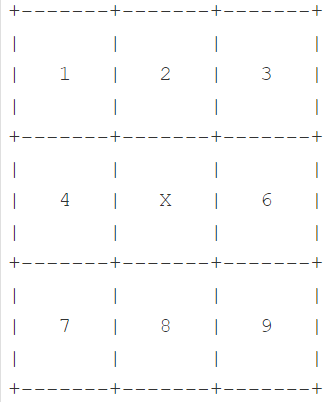  
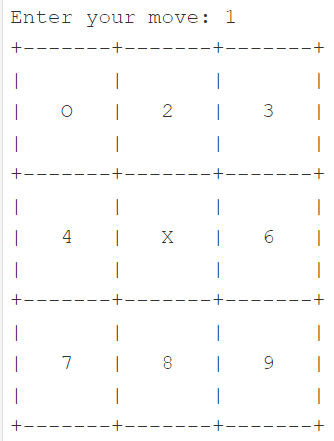  
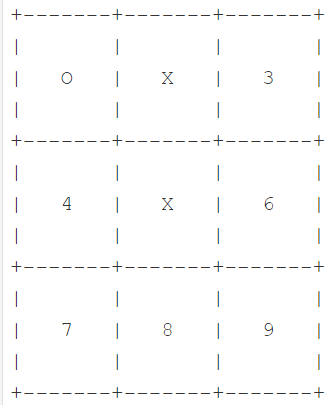  
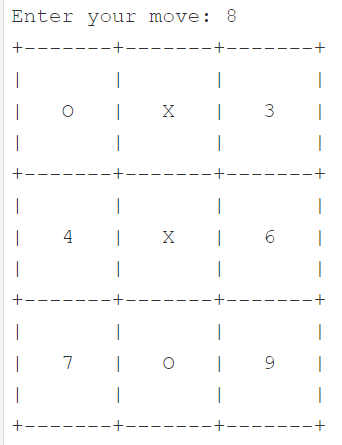  
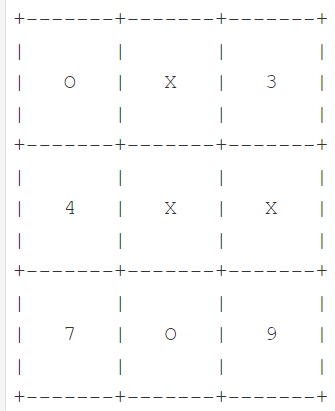  
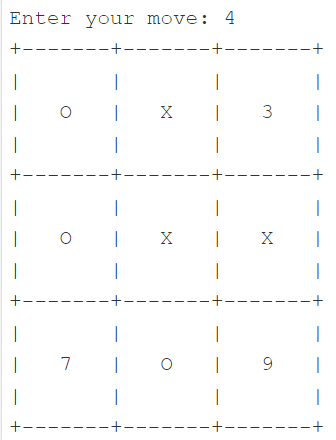  
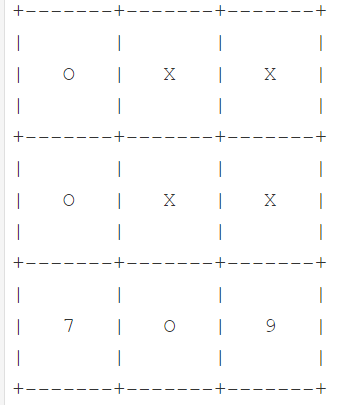  
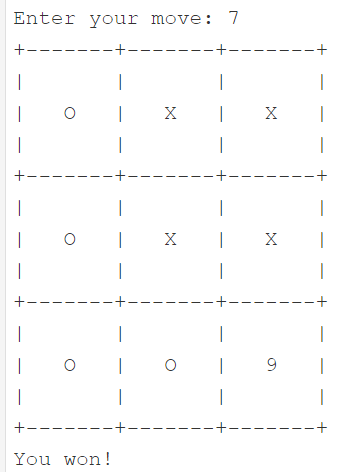  

### Вимоги

Реалізуйте такі функції:

* дошка повинна зберігатися як список з трьох елементів, у той час як кожен елемент є ще одним список з трьох елементів (внутрішні списки представляють рядки), так що всі квадрати можуть бути доступні з використанням наступного синтаксису:  

`board[row][column]`  

* кожен із елементів внутрішнього списку може містити `'O'`, `'X'` або цифру, що становить номер квадрата (такий квадрат вважається вільним)
* зовнішній вигляд дошки повинен бути таким самим, як у прикладі.  

Отримати випадкове ціле число можна за допомогою функції Python під назвою `randrange()`. У наведеному нижче прикладі програми показано, як використовувати її (програма виводить десять випадкових чисел від `0` до `8`).

Примітка: інструкція `from-import` забезпечує доступ до функції `randrange`, визначеної у зовнішньому модулі Python, що викликається `random`.

```
from random import randrange

for i in range(10):  
    print(randrange(8))
```

In [2]:
from random import randrange


def display_board(board):
    for row in board:
        print("+-------" * 3 + "+")
        for _ in range(3):
            print("|       ", end="")
        print("|")
        for square in row:
            print("|   " + square + "   ", end="")
        print("|")
        for _ in range(3):
            print("|       ", end="")
        print("|")
    print("+-------" * 3 + "+")


def enter_move(board):
    while True:
        move = int(input("Enter your move: ")) - 1
        row = move // 3
        col = move % 3
        if 0 <= row <= 2 and 0 <= col <= 2 and (board[row][col] == " " or board[row][col].isdigit()):
            board[row][col] = "O"
            break
        else:
            print("Wrong move. Try again.")


def make_list_of_free_fields(board):
    free_fields = []
    for i, row in enumerate(board):
        for j, square in enumerate(row):
            if square == " " or square.isdigit():
                free_fields.append((i, j))
    return free_fields


def victory_for(board, sign):
    # Check rows, columns and diagonals
    for i in range(3):
        if all([cell == sign for cell in board[i]]):  # Check row
            return True
        if all([board[j][i] == sign for j in range(3)]):  # Check column
            return True
    if board[0][0] == board[1][1] == board[2][2] == sign:  # Check main diagonal
        return True
    if board[0][2] == board[1][1] == board[2][0] == sign:  # Check other diagonal
        return True
    return False

def draw_move(board):
    free_fields = make_list_of_free_fields(board)
    if free_fields:
        move = free_fields[randrange(len(free_fields))]
        board[move[0]][move[1]] = "X"


# Testing the functions
board = [[str(i * 3 + j + 1) for j in range(3)] for i in range(3)]
board[1][1] = "X"
while True:
    display_board(board)
    if victory_for(board, "X"):
        print("Computer won!")
        break
    elif victory_for(board, "O"):
        print("You won!")
        break
    if len(make_list_of_free_fields(board)) == 0:
        print("Draw!")
        break
    enter_move(board)
    display_board(board)
    if victory_for(board, "O"):
        display_board(board)
        print("You won!")
        break
    draw_move(board)


+-------+-------+-------+
|       |       |       |
|   1   |   2   |   3   |
|       |       |       |
+-------+-------+-------+
|       |       |       |
|   4   |   X   |   6   |
|       |       |       |
+-------+-------+-------+
|       |       |       |
|   7   |   8   |   9   |
|       |       |       |
+-------+-------+-------+


Enter your move:  1


+-------+-------+-------+
|       |       |       |
|   O   |   2   |   3   |
|       |       |       |
+-------+-------+-------+
|       |       |       |
|   4   |   X   |   6   |
|       |       |       |
+-------+-------+-------+
|       |       |       |
|   7   |   8   |   9   |
|       |       |       |
+-------+-------+-------+
+-------+-------+-------+
|       |       |       |
|   O   |   2   |   3   |
|       |       |       |
+-------+-------+-------+
|       |       |       |
|   4   |   X   |   6   |
|       |       |       |
+-------+-------+-------+
|       |       |       |
|   7   |   8   |   X   |
|       |       |       |
+-------+-------+-------+


Enter your move:  2


+-------+-------+-------+
|       |       |       |
|   O   |   O   |   3   |
|       |       |       |
+-------+-------+-------+
|       |       |       |
|   4   |   X   |   6   |
|       |       |       |
+-------+-------+-------+
|       |       |       |
|   7   |   8   |   X   |
|       |       |       |
+-------+-------+-------+
+-------+-------+-------+
|       |       |       |
|   O   |   O   |   X   |
|       |       |       |
+-------+-------+-------+
|       |       |       |
|   4   |   X   |   6   |
|       |       |       |
+-------+-------+-------+
|       |       |       |
|   7   |   8   |   X   |
|       |       |       |
+-------+-------+-------+


Enter your move:  3


Wrong move. Try again.


Enter your move:  6


+-------+-------+-------+
|       |       |       |
|   O   |   O   |   X   |
|       |       |       |
+-------+-------+-------+
|       |       |       |
|   4   |   X   |   O   |
|       |       |       |
+-------+-------+-------+
|       |       |       |
|   7   |   8   |   X   |
|       |       |       |
+-------+-------+-------+
+-------+-------+-------+
|       |       |       |
|   O   |   O   |   X   |
|       |       |       |
+-------+-------+-------+
|       |       |       |
|   4   |   X   |   O   |
|       |       |       |
+-------+-------+-------+
|       |       |       |
|   X   |   8   |   X   |
|       |       |       |
+-------+-------+-------+
Computer won!


### Завдання для самостіної роботи

1. Виконати завдання.

1. Створити файл __project_1_StudentLastName.py__ з написаним кодом. 

1. Закомітити файл у локальний репозиторій.

1. Відправити ("запушити") поточну версію Git-проєкта у віддалений репозиторій на GitHub.

1. Звіт має складатися з файлу (за основу взяти __цей Python-зошит__)  `project_1_StudentLastName.ipynb`. (Можливі якісь додакові файли)

### References

1. [Anaconda (Python distribution)](https://uk.wikipedia.org/wiki/Anaconda_(Python_distribution))
2. [Conda](https://conda.io/en/latest/)
3. [Pro Git Book](https://git-scm.com/book/en/v2)
4. [OpenEDG Python Institute](https://pythoninstitute.org/)
5. [Cisco. Networking Academy](https://www.netacad.com/)
6. [Научно-издательская система Quarto](https://data-visualization-blog.netlify.app/posts/quarto/)